<a href="https://colab.research.google.com/github/Kovibordy/nero/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вариант 23

Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Input

Исходные данные

In [2]:
data = {
    "X": [4.27017564, 3.06662571, 2.92034179, 3.54035631, 2.92880708, 3.75967715,
 2.60133066, 2.33543134, 3.99020998, 3.69987263, 2.56506922, 0.93305494,
 3.36209817, 2.20253917, 2.23299696, 2.74799347, 3.94993514, 2.41629262,
 2.12504957, 0.71991106, 1.76751982, 3.51779902, 1.84475146, 1.98261509,
 1.365547  , 0.71275141, 4.79066345, 1.89571432, 2.28387108, 3.44742943,
 3.48091319, 3.01671624, 3.26534793, 8.02478124, 7.66850221, 7.25860412,
 8.17561209, 8.37744212, 8.12578586, 7.24237776, 8.17666957, 7.76368151,
 7.28891306, 8.80701425, 8.02595912, 7.99674756, 8.31535994, 7.52997908,
 7.19212449, 7.95083261, 7.49048712, 7.83289361, 7.82465423, 7.25825445,
 7.46416862, 8.66826476, 8.14704223, 7.85519477, 8.17573843, 8.45077548,
 8.28207754, 8.66075074, 8.32563903, 7.78759013, 7.87968753, 8.05674937,
 13.68597463,12.35032346,13.0050918 ,12.90178581,12.576617  ,12.74416015,
 11.92273945,12.20466884,12.48234112,12.31831585,12.9314811 ,13.2868798 ,
 12.22100353,12.52702   ,12.48395563,13.15293572,13.79762338,12.1315581 ,
 11.90712122,12.49377148,12.70237506,13.64046939,12.57654596,12.35922476,
 13.43355647,12.44414852,12.70073681,13.39151658,12.35561399,13.23997011,
 12.74155693,12.52073994,11.91832046,20.57530318,16.89082578,18.68895004,
 17.34022377,21.5974722 ,20.09377918,19.15392005,22.92939906,17.12628965,
 19.78541853,20.14907823,21.49354608,20.91402162,20.63580989,19.42378811,
 17.74217545,17.78843505,16.66864809,19.74683763,20.59868754,20.3366381 ,
 18.57424151,18.85801445,19.04459867,19.31402925,19.11223159,19.35385562,
 24.50673676,18.00971712,17.54831207,20.7418964 ,18.99635916,19.40836308],
    "Y": [ 5.52012069, 5.64355751, 5.13261034, 6.4346676 , 5.36080852, 6.29674366,
 4.71631526, 4.87307796, 5.25790278, 6.47149602, 6.08396935, 5.74313547,
 6.34157891, 5.30455966, 4.63753964, 6.10127316, 4.63389226, 5.70566942,
 4.76939702, 5.7575365 , 4.71031669, 5.20253713, 5.46740787, 5.997821  ,
 4.98126356, 5.54700642, 4.86502942, 5.15813403, 5.5553077 , 5.92420973,
 5.58633793, 5.19841498, 5.37026877, 1.34860535, 1.18031514, 1.51309854,
 1.64209233, 0.63197097, 1.91644453, 2.01896609, 1.59503652, 1.82721307,
 2.06799414, 2.23195469, 1.55744357, 2.21016045, 1.29994057, 1.96129972,
 1.54837407, 1.60955847, 1.65101304, 2.06036202, 0.59031644, 2.22283444,
 2.24161463, 1.30710337, 1.76800336, 1.75626562, 2.01189924, 2.34628654,
 1.8966779 , 1.65869336, 1.28622412, 1.38598207, 2.23432302, 1.58123632,
 8.11188223, 8.73789792, 9.28877151, 9.54867605, 7.73470027, 8.20703627,
 10.74161555,10.35138843,10.73788878, 9.63037183, 8.46414733,10.74313289,
 7.49941585, 9.50588581, 9.17060408,10.83479694, 9.62856774,10.81231424,
 9.95660901, 8.58910859,10.57552609, 8.40826869, 6.44178668, 8.98158163,
 10.62835113,10.02731565,10.25110044,11.33386499, 9.27108986, 6.40697098,
 8.20175965, 9.6958445 , 9.11905457,16.83878825,15.08022551,15.97153839,
 16.75038881,15.87885386,17.33671197,16.23075748,14.07852872,15.28359851,
 17.86790939,18.22632864,12.63232881,16.01251893,17.1614748 ,13.88128736,
 16.65465572,13.81121579,14.4501833 ,14.17784911,15.14632039,16.03675072,
 15.67989087,15.01590848,14.8216564 ,17.23747018,18.42488316,18.24770998,
 17.67163536,15.67249959,15.89601815,13.08257824,14.76977191,16.42217299],
    "class": ['Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1', 'Group1',
'Group1', 'Group1', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2', 'Group2',
'Group2', 'Group2', 'Group2', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3', 'Group3',
'Group3', 'Group3', 'Group3', 'Group3', 'Group4', 'Group4', 'Group4', 'Group4',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4', 'Group4',
'Group4', 'Group4', 'Group4', 'Group4', 'Group4']
}

Создание DataFrame и просмотр первых строк

In [3]:
df = pd.DataFrame(data)
print(df.head())

          X         Y   class
0  4.270176  5.520121  Group1
1  3.066626  5.643558  Group1
2  2.920342  5.132610  Group1
3  3.540356  6.434668  Group1
4  2.928807  5.360809  Group1


Разделение данных на входные и выходные переменные

In [4]:
X = np.c_[data["X"], data["Y"]]
Y = np.array(data["class"]).reshape(-1, 1)

Нормализация входных данных

In [5]:
xmin, xmax = X.min(), X.max()
X_norm = (X - xmin) / (xmax - xmin)


Кодирование выходных данных (One-Hot Encoding)

In [6]:
ohe = OneHotEncoder(sparse_output=False)
Y_enc = ohe.fit_transform(Y)

Разделение данных на обучающую и тестовую выборки

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_norm, Y_enc, test_size=0.25)
print(f"Форма X_train: {x_train.shape}, Y_train: {y_train.shape}")
print(f"Форма X_test: {x_test.shape}, Y_test: {y_test.shape}")

Форма X_train: (99, 2), Y_train: (99, 4)
Форма X_test: (33, 2), Y_test: (33, 4)


Создание нейронной сети

In [10]:
model = Sequential([
    Dense(4, activation="relu", input_shape=(2,)),
    Dense(4, activation="relu"),
    Dense(y_train.shape[1], activation="softmax")
])

Компиляция модели

In [11]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["categorical_accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 4)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │              20 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52 (208.00 B)

 Trainable params: 52 (208.00 B)

 Non-trainable params: 0 (0.00 B)

Обучение модели

In [12]:
history = model.fit(x_train, y_train, epochs=80, batch_size=10)

Epoch 1/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - categorical_accuracy: 0.2976 - loss: 1.3738
Epoch 2/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3121 - loss: 1.3676  
Epoch 3/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2310 - loss: 1.3763 
Epoch 4/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.2230 - loss: 1.3645 
Epoch 5/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2807 - loss: 1.3627 
Epoch 6/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2222 - loss: 1.3537 
Epoch 7/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3080 - loss: 1.3391 
Epoch 8/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3140 - loss: 1.3457 
Epoch 9/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4283 - loss: 1.3410 
Epoch 10/80
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.6960 - loss: 1.3256 
Epoch 11/80
10/10 ━━━━━━━━━━━

График метрик обучения

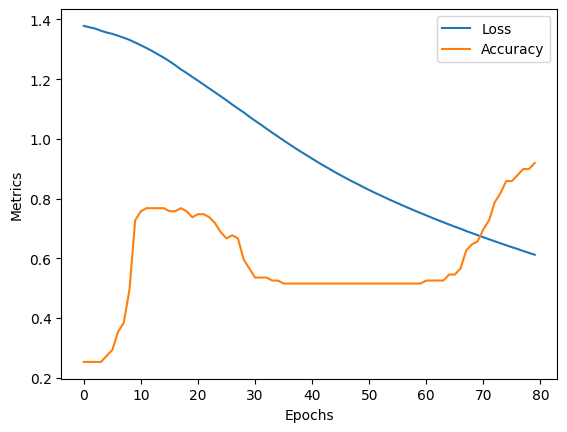

In [13]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["categorical_accuracy"], label="Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Metrics")
plt.legend()
plt.show()

Оценка модели на тестовой выборке

In [14]:
model.evaluate(x_test, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - categorical_accuracy: 0.8163 - loss: 0.6384  


[0.6408441662788391, 0.8181818127632141]

Подсчёт количества правильно классифицированных объектов

In [15]:
correct_predictions = 0
for i in range(len(x_test)):
    prediction = model.predict(x_test[i].reshape(1, -1))
    predicted_class = np.argmax(prediction)
    actual_class = np.argmax(y_test[i])
    if predicted_class == actual_class:
        correct_predictions += 1
    print(f"Распознано как: {ohe.categories_[0][predicted_class]}, Фактически: {ohe.categories_[0][actual_class]}")

print(f"Верно классифицировано: {correct_predictions} из {len(x_test)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Распознано как: Group3, Фактически: Group3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Распознано как: Group1, Фактически: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Распознано как: Group2, Фактически: Group2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Распознано как: Group4, Фактически: Group4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Распознано как: Group1, Фактически: Group2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Распознано как: Group1, Фактически: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Распознано как: Group4, Фактически: Group3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Распознано как: Group1, Фактически: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Распознано как: Group4, Фактически: Group4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Распознано как: Group4, Фактически: Group4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Распознано как: Group1, Фактически: Group1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Распознано как: Group3, Фактически: Group3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 